# Data preprocessing 

In [3]:
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [4]:
origin_data = pd.read_csv("data.csv")
data = origin_data.copy()
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


### Renaming columns

In [5]:
data.rename(columns = {'label':'Plant', "N" : "Nitrogen", "P": "Phosphorus", "K": "Potassium"}, inplace = True)

### Handling missing values

In [6]:
data.isnull().sum()

Nitrogen        2
Phosphorus      9
Potassium       2
temperature    10
humidity       21
ph              8
rainfall        3
Plant           0
dtype: int64

<AxesSubplot: title={'center': 'The percentage of missing values'}, ylabel='percentage'>

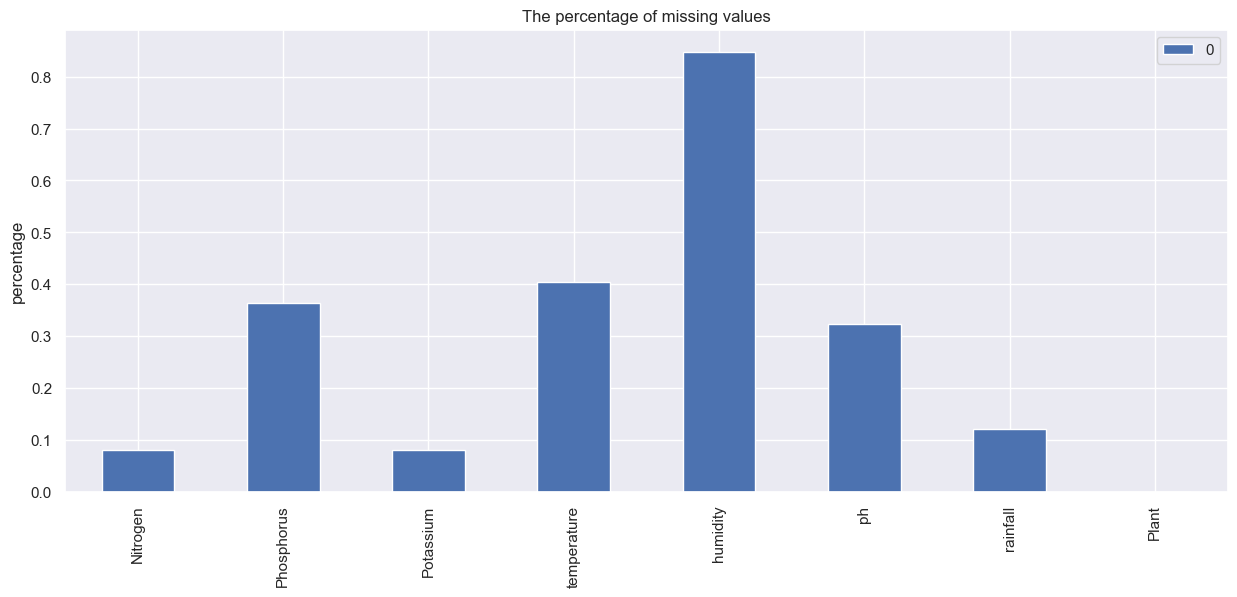

In [7]:
sns.set()
missing_values = pd.DataFrame(data.isnull().sum() / len(data) * 100)
missing_values.plot(kind='bar',title='The percentage of missing values',ylabel='percentage',figsize=(15,6))

In [8]:
#complete missing values with the mean value
dataTemp = data.drop(columns=["Plant"])

for column in dataTemp.columns : 
    imp = SimpleImputer(strategy='mean')
    data[column] = imp.fit_transform(data[[column]])

In [9]:
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
Plant          0
dtype: int64

### Encoding categories features 

In [10]:
names = data['Plant'].unique()
print(names)
encoded_data = data.copy()
encoded_data["Plant"] = LabelEncoder().fit_transform(encoded_data[["Plant"]])
classes = encoded_data['Plant'].unique()
print(classes)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'corn' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'tomato' 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut'
 'cotton' 'jute' 'weed' 'coffee']
[21 12  3 10 19  6 14 15  2 11 20  1 13  8 22 23 16  0 17 18  4  7  9 24
  5]


c:\Users\khadija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

The first step is to split data into two parts :
1.The columns of data that we will use to make classification.
2.The colum of data that we want to predict.
We will use the conventional notation of X ( capital X ) to represent the colums of data that we will use to make classification and y (lower y) to represent the thing we want to predict in this case we want to predict the plant

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Using copy to ensure that the original data is not modified when we modefy X or y.
#removing space in colums's names
encoded_data.columns = encoded_data.columns.str.strip()
# Split dataset into training set and test set
y = encoded_data['Plant'].copy()
#removing the label colum from the dataset and store it in the X varaiable
X = encoded_data.drop('Plant', axis=1).copy()
x_train, x_test, y_train, y_test = train_test_split(X,y,shuffle = True, test_size=0.3,random_state=42)